### Ideas for Stochastic Gradient Descent LinReg Specifications
- split into 7 for expanding window validation
- features squared
- Ridge, Lasso and lamda regularization
- learning rate
- max iterations, convergence goal eta
- Mean Absolute Percentage Error (MAPE): Measures the accuracy of the forecast as a percentage of the actual value.
- Root Mean Squared Error (RMSE): Measures the average magnitude of the errors.

Create a stochastic gradient descent linear regression with the following specifications:

- Train-Test-Validate Split
- Train: 70% of the data.
- Test: 20% of the data.
- Validate: 10% of the data.
- Expanding CV Fold Sizes:, Initial Train Size: 50% of the train set, Test Size (Fixed): 10% of the train set, Number of Folds: (total points - initial train set) // test size = 5.
- Iterate for ridge/lasso penalty, lamda and different learning rate
- Choose convergence goal wisely
- Please print a bar that shows how much of computation has already been made
- Make sure to respect all the given points

- make sure lowest ist zero
- stochastic gradient descent without regularization


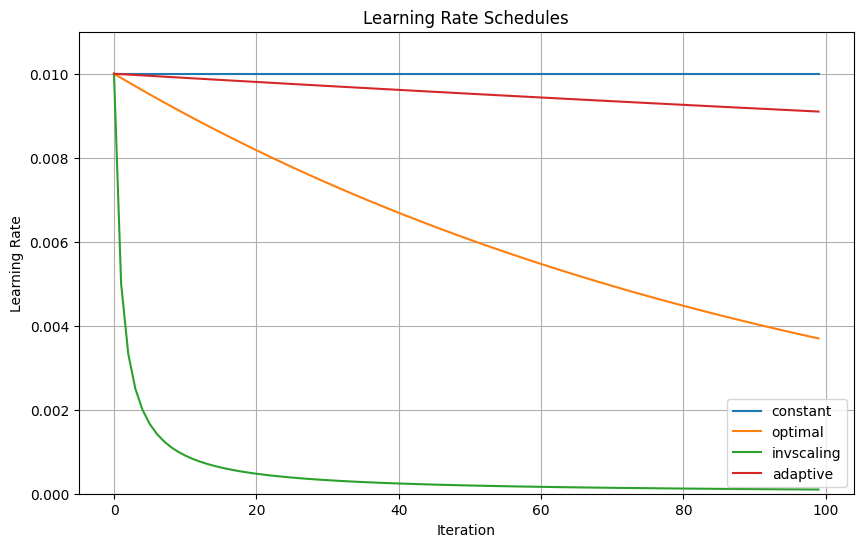

In [2]:
import matplotlib.pyplot as plt

# Sample data for plotting
t = range(100)
constant = [0.01] * 100
optimal = [0.01 * (0.99 ** i) for i in t]
invscaling = [0.01 / (i + 1) for i in t]
adaptive = [0.01 / (1 + 0.001 * i) for i in t]

# Plotting with zoomed-in y-axis
plt.figure(figsize=(10, 6))
plt.plot(t, constant, label='constant')
plt.plot(t, optimal, label='optimal')
plt.plot(t, invscaling, label='invscaling')
plt.plot(t, adaptive, label='adaptive')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedules')
plt.legend()
plt.grid(True)
plt.ylim(0, max(optimal) * 1.1)  # Adjust the y-axis limits to ensure optimal learning rate is visible
plt.show()


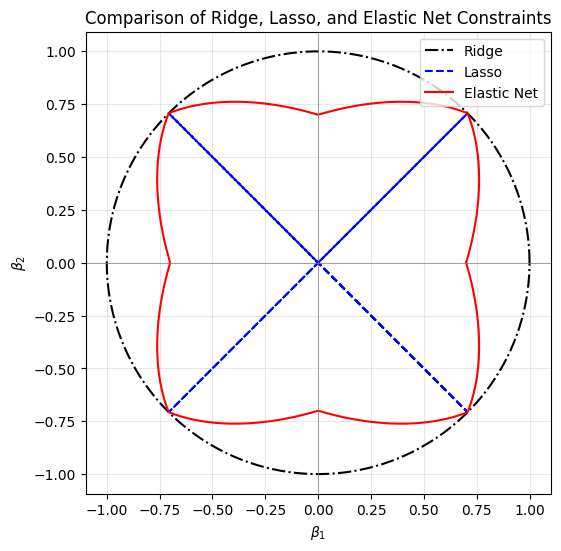

In [8]:
import numpy as np

# Define theta values for plotting the constraints
theta = np.linspace(0, 2 * np.pi, 500)

# Ridge constraint (circle)
ridge_x = np.cos(theta)
ridge_y = np.sin(theta)

# Lasso constraint (diamond shape)
lasso_x = np.cos(theta)
lasso_y = np.sin(theta)
lasso_x = np.sign(lasso_x) * np.minimum(np.abs(lasso_x), np.abs(lasso_y))
lasso_y = np.sign(lasso_y) * np.minimum(np.abs(lasso_x), np.abs(lasso_y))

# Elastic Net constraint (combination of Ridge and Lasso)
elastic_net_x = np.cos(theta) * 0.7 + np.sign(np.cos(theta)) * np.minimum(np.abs(np.cos(theta) * 0.3), np.abs(np.sin(theta) * 0.3))
elastic_net_y = np.sin(theta) * 0.7 + np.sign(np.sin(theta)) * np.minimum(np.abs(np.sin(theta) * 0.3), np.abs(np.cos(theta) * 0.3))

# Plotting
plt.figure(figsize=(6, 6))
plt.plot(ridge_x, ridge_y, linestyle='-.', label='Ridge', color='black')
plt.plot(lasso_x, lasso_y, linestyle='--', label='Lasso', color='blue')
plt.plot(elastic_net_x, elastic_net_y, linestyle='-', label='Elastic Net', color='red')

# Add labels and legend
plt.axhline(0, color='gray', linewidth=0.5, linestyle='-')
plt.axvline(0, color='gray', linewidth=0.5, linestyle='-')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.legend()
plt.title("Comparison of Ridge, Lasso, and Elastic Net Constraints")
plt.grid(alpha=0.3)
plt.axis('equal')
plt.show()


### Top50CombLagged Basic

Refined Best Parameters: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'penalty': 'elasticnet'}

Refined Best Score: -6.595995794240368

Refined Mean Squared Error on Test Set: 5.276813800003844

Refined Mean Squared Error on Validation Set: 8.210067784409524

### Top50CombLagged Squared

Refined Best Parameters: {'alpha': 0.1, 'eta0': 0.001, 'learning_rate': 'invscaling', 'penalty': 'l1'}

Refined Best Score: -6.947430803846115

Refined Mean Squared Error on Test Set: 5.066145317619576

Refined Mean Squared Error on Validation Set: 7.95485567595084

### Top50CombLagged Diff

Refined Best Parameters: {'alpha': 0.01, 'eta0': 0.001, 'learning_rate': 'invscaling', 'penalty': 'l1'}

Refined Best Score: -6.63179938426928

Refined Mean Squared Error on Test Set: 5.206685968435315

Refined Mean Squared Error on Validation Set: 8.689589865987218

### Top50CombLagged Diff and Squared

Refined Best Parameters: {'alpha': 0.1, 'eta0': 0.0001, 'learning_rate': 'invscaling', 'penalty': 'elasticnet'}

Refined Best Score: -6.896313805576216

Refined Mean Squared Error on Test Set: 4.987797282604896

Refined Mean Squared Error on Validation Set: 9.16831901485642

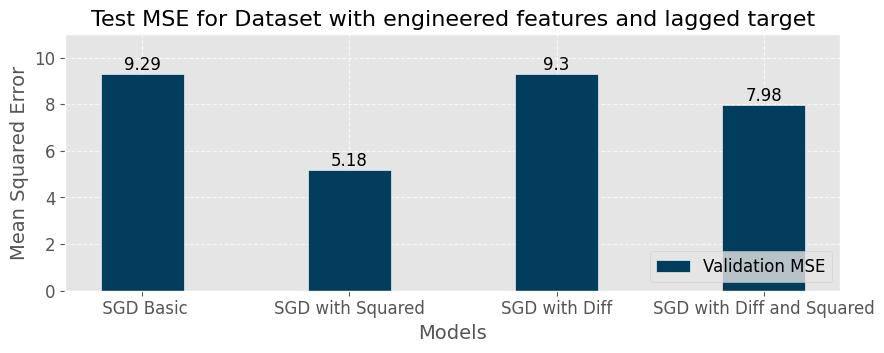

In [6]:
# Set the style
plt.style.use('ggplot')

# Plotting only validation MSE with specified color scheme
plt.figure(figsize=(10, 3.33))
bars = plt.bar(x, validation_mse, color='#033D5D', edgecolor='#E6EEF2', width=0.4, label='Validation MSE', align='center')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Test MSE for Dataset with engineered features and lagged target', fontsize=16)
plt.xticks(x, models, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 11)  # Set y-axis limit to 10
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom', ha='center', fontsize=12, color='black')  # va: vertical alignment

plt.show()
